In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2015/05/NHS-111-Monthly-Extraction-Apr15-to-Mar16-web-file-revised-11.08.16.csv'

data = pd.read_csv(url, header = 4)
data.head()

# https://www.healthjobsuk.com/job/UK/Tyne_Wear/Newcastle_upon_Tyne/NHS_Business_Services_Authority/Data_Analyst/Data_Analyst-v7138901?_ts=1489

,Yearnumber,Periodname,Provider Org Code,Provider Name,Commissioner Org Code,Commissioner Org Name,Nhs1 Population SUM,Nhs1 Number Calls Offered SUM,Nhs1 Calls Through 111 SUM,Nhs1 Calls Through Other SUM,...,Nhs1 Recommend To Other SUM,Nhs1 Not Recommend SUM,Nhs1 Given Health Information SUM,Nhs1 Recommended Home Care SUM,Nhs1 Recommended Non Clinical SUM,Nhs1 Time Call Handlers SUM,Nhs1 Time Clinical Staff SUM,Nhs1 Cost Call Handlers SUM,Nhs1 Cost Clinical Staff SUM,Nhs1 Total Other Costs SUM
0,2015-16,Apr-15,111AA1,NORTH EAST ENGLAND NHS 111,00N,NHS SOUTH TYNESIDE CCG,2623300,67491,63764,3727,...,3068,5604,870,2800,1934,487251.0,145285.0,0,0,0
1,2015-16,Apr-15,111AA2,LINCOLNSHIRE NHS 111,03T,NHS LINCOLNSHIRE EAST CCG,733200,16087,16087,0,...,350,1295,104,734,457,0.0,0.0,0,0,0
2,2015-16,Apr-15,111AA3,LUTON NHS 111,06P,NHS LUTON CCG,213700,3362,3362,0,...,87,289,33,172,84,0.0,0.0,0,0,0
3,2015-16,Apr-15,111AA4,NOTTINGHAM CITY NHS 111,04K,NHS NOTTINGHAM CITY CCG,1002400,22698,22595,103,...,553,4081,373,1014,2694,119676.0,47171.0,0,0,0
4,2015-16,Apr-15,111AA5,DERBYSHIRE NHS 111,04J,NHS NORTH DERBYSHIRE CCG,1006500,24872,24417,455,...,1057,4659,424,1235,3000,126741.0,39071.0,0,0,0


In [15]:
data['Provider Name']

0            NORTH EAST ENGLAND NHS 111
1                  LINCOLNSHIRE NHS 111
2                         LUTON NHS 111
3               NOTTINGHAM CITY NHS 111
4                    DERBYSHIRE NHS 111
                     ...               
529                    CORNWALL NHS 111
530                       DEVON NHS 111
531                BEDFORDSHIRE NHS 111
532               STAFFORDSHIRE NHS 111
533    NORTH WEST INC BLACKPOOL NHS 111
Name: Provider Name, Length: 534, dtype: object

### Check for skewness in these columns

In [16]:
skew_columns = ['Nhs1 Time Call Handlers SUM', 'Nhs1 Time Clinical Staff SUM',
                'Nhs1 Total Other Costs SUM', 'Nhs1 Cost Call Handlers SUM', 'Nhs1 Cost Clinical Staff SUM']

# Check for skewness in these columns
data[skew_columns].skew()

Nhs1 Time Call Handlers SUM     2.475599
Nhs1 Time Clinical Staff SUM    2.754802
Nhs1 Total Other Costs SUM      0.000000
Nhs1 Cost Call Handlers SUM     6.550396
Nhs1 Cost Clinical Staff SUM    6.592372
dtype: float64

In [17]:
data = data.drop(columns = ['Nhs1 Total Other Costs SUM'])

In [18]:
columns_cost = ['Nhs1 Time Call Handlers SUM', 'Nhs1 Time Clinical Staff SUM',
                'Nhs1 Cost Call Handlers SUM', 'Nhs1 Cost Clinical Staff SUM']

# Replace 0s with NaN and reassign it back
data[columns_cost] = data[columns_cost].replace(0, np.nan)

# Fill NaN values with mean of each column

for col in columns_cost:
    median = data[col].median()
    data[col] = data[col].fillna(median)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Yearnumber                          534 non-null    object 
 1   Periodname                          534 non-null    object 
 2   Provider Org Code                   534 non-null    object 
 3   Provider Name                       534 non-null    object 
 4   Commissioner Org Code               534 non-null    object 
 5   Commissioner Org Name               534 non-null    object 
 6   Nhs1 Population SUM                 534 non-null    int64  
 7   Nhs1 Number Calls Offered SUM       534 non-null    int64  
 8   Nhs1 Calls Through 111 SUM          534 non-null    int64  
 9   Nhs1 Calls Through Other SUM        534 non-null    int64  
 10  Nhs1 Abandoned Calls SUM            534 non-null    int64  
 11  Nhs1 Answered Calls SUM             534 non-n

### Convert To Minutes

In [20]:
def time_to_minutes(time_str):
    try:
        # Split the time string into hours, minutes, seconds
        parts = list(map(int, time_str.split(':')))
        if len(parts) == 3:
            hours, minutes, seconds = parts
        elif len(parts) == 2:
            hours = 0
            minutes, seconds = parts
        else:
            return None  # Handle invalid formats
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return round(total_seconds / 60, 2)  # Convert to minutes
    except:
        return None  # Handle missing/invalid data 

# Apply the function to the time column
data['Ave_Wtransfer_Time_Minutes'] = data['Nhs1 Ave Wtransfer Time SUM'].apply(time_to_minutes)
data['Episode_Length_Minutes'] = data['Nhs1 Ave Episode Length SUM'].apply(time_to_minutes)

In [21]:
# Check for missing numbers
data['Ave_Wtransfer_Time_Minutes'].isnull().sum(), data['Episode_Length_Minutes'].isnull().sum()

(np.int64(44), np.int64(44))

In [95]:
# Ckeck for skewness 
print(data['Ave_Wtransfer_Time_Minutes'].skew())

3.1338354042109016


### Handling Missing Values

In [23]:
columns = ['Ave_Wtransfer_Time_Minutes', 'Episode_Length_Minutes']

for col in columns:
    median = data[col].median()
    data[col] = data[col].fillna(median)

In [24]:
data['Abandonment Rate'] = data['Nhs1 Abandoned Calls SUM'] / data['Nhs1 Number Calls Offered SUM']
data['Abandonment Rate']

0      0.016106
1      0.002611
2      0.004164
3      0.011411
4      0.010132
         ...   
529    0.091202
530    0.093975
531    0.089722
532    0.046921
533    0.229041
Name: Abandonment Rate, Length: 534, dtype: float64

### Cost Optimization

In [25]:
# Calculate total cost
data['Total_Cost'] = data['Nhs1 Cost Call Handlers SUM'] + data['Nhs1 Cost Clinical Staff SUM']

# Calculate cost per answered call (handle division by zero and NaN)
data['Cost_Per_Answered_Call'] = (
    data['Total_Cost'] / data['Nhs1 Answered Calls SUM']
).replace([np.inf, -np.inf], 0).fillna(0)  # Replace inf, -inf, and NaN with 0

# Validate results
data[['Provider Name', 'Total_Cost', 'Nhs1 Answered Calls SUM', 'Cost_Per_Answered_Call']].head()

,Provider Name,Total_Cost,Nhs1 Answered Calls SUM,Cost_Per_Answered_Call
0,NORTH EAST ENGLAND NHS 111,12747.0,56339,0.226255
1,LINCOLNSHIRE NHS 111,12747.0,16045,0.794453
2,LUTON NHS 111,12747.0,3330,3.827928
3,NOTTINGHAM CITY NHS 111,12747.0,22131,0.575979
4,DERBYSHIRE NHS 111,12747.0,24326,0.524007


### Calculate average wait times by provider:

In [115]:
data.groupby('Provider Name')['Ave_Wtransfer_Time_Minutes'].mean().sort_values(ascending = False).head()

Provider Name
NORTH ESSEX NHS 111                   4.490000
GREAT YARMOUTH AND WAVENEY NHS 111    4.050909
INNER NORTH WEST LONDON NHS 111       2.630909
SOUTH ESSEX NHS 111                   2.455455
NORTH CENTRAL LONDON NHS 111          1.974545
Name: Ave_Wtransfer_Time_Minutes, dtype: float64

### Correlation Matrix 

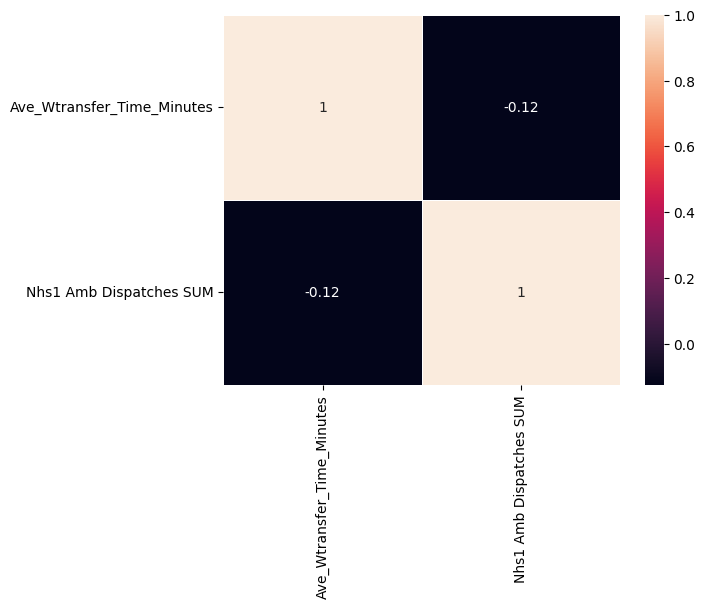

In [26]:
corr = data[['Ave_Wtransfer_Time_Minutes', 'Nhs1 Amb Dispatches SUM']].corr()
sns.heatmap(corr, annot = True, linewidths = 0.5)
plt.xticks(rotation = 90)
plt.show()

### Patient Outcomes & Triage Accuracy

In [123]:
data = data.dropna(subset=['Episode_Length_Minutes', 'Nhs1 Amb Dispatches SUM'])

### Regression Analysis

In [27]:
import statsmodels.api as sm

X = data['Episode_Length_Minutes']  # Independent variable (call duration)
y = data['Nhs1 Amb Dispatches SUM'] # Dependent variable (ambulance dispatches)

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Nhs1 Amb Dispatches SUM   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                 -0.001
Method:                      Least Squares   F-statistic:                    0.5502
Date:                     Sat, 26 Apr 2025   Prob (F-statistic):              0.459
Time:                             21:33:46   Log-Likelihood:                -4988.0
No. Observations:                      534   AIC:                             9980.
Df Residuals:                          532   BIC:                             9989.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

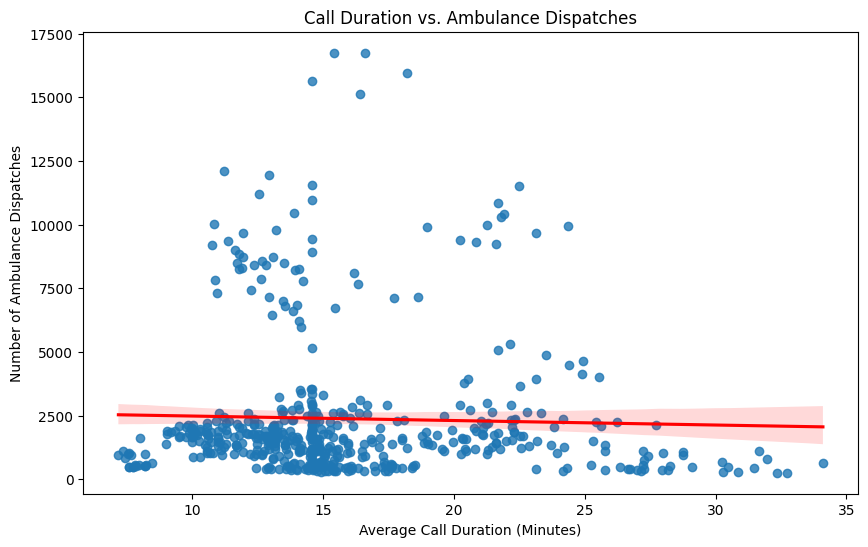

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='Episode_Length_Minutes', y='Nhs1 Amb Dispatches SUM', data=data, line_kws={'color': 'red'})
plt.title('Call Duration vs. Ambulance Dispatches')
plt.xlabel('Average Call Duration (Minutes)')
plt.ylabel('Number of Ambulance Dispatches')
plt.show()

### Calculate Referral Rates

In [29]:
# Calculate referral rates
data['A&E_Referral_Rate'] = data['Nhs1 Recommend To Ae SUM'] / data['Nhs1 Answered Calls SUM']
data['PrimaryCare_Referral_Rate'] = data['Nhs1 Recommend To Primcare SUM'] / data['Nhs1 Answered Calls SUM']

provider_stats = data.groupby('Provider Name').agg({
    'Nhs1 Recommend To Ae SUM': 'sum',
    'Nhs1 Recommend To Primcare SUM': 'sum',
    'Nhs1 Answered Calls SUM': 'sum',
    'A&E_Referral_Rate': 'mean',
    'PrimaryCare_Referral_Rate': 'mean'
}).reset_index()

# Sort by A&E referral rate (highest to lowest)
provider_stats_sorted = provider_stats.sort_values('A&E_Referral_Rate', ascending=False)
provider_stats_sorted.head()

,Provider Name,Nhs1 Recommend To Ae SUM,Nhs1 Recommend To Primcare SUM,Nhs1 Answered Calls SUM,A&E_Referral_Rate,PrimaryCare_Referral_Rate
29,NORTH WEST EXC BLACKPOOL NHS 111,6503,32674,65377,0.099469,0.499778
32,NORTH WEST NHS 111,34010,183856,350716,0.097125,0.523564
39,SOUTH EAST LONDON NHS 111,26943,143358,290448,0.093554,0.495857
24,MILTON KEYNES NHS 111,5479,33442,60975,0.089997,0.547824
22,LUTON NHS 111,3464,27795,38959,0.089381,0.714890


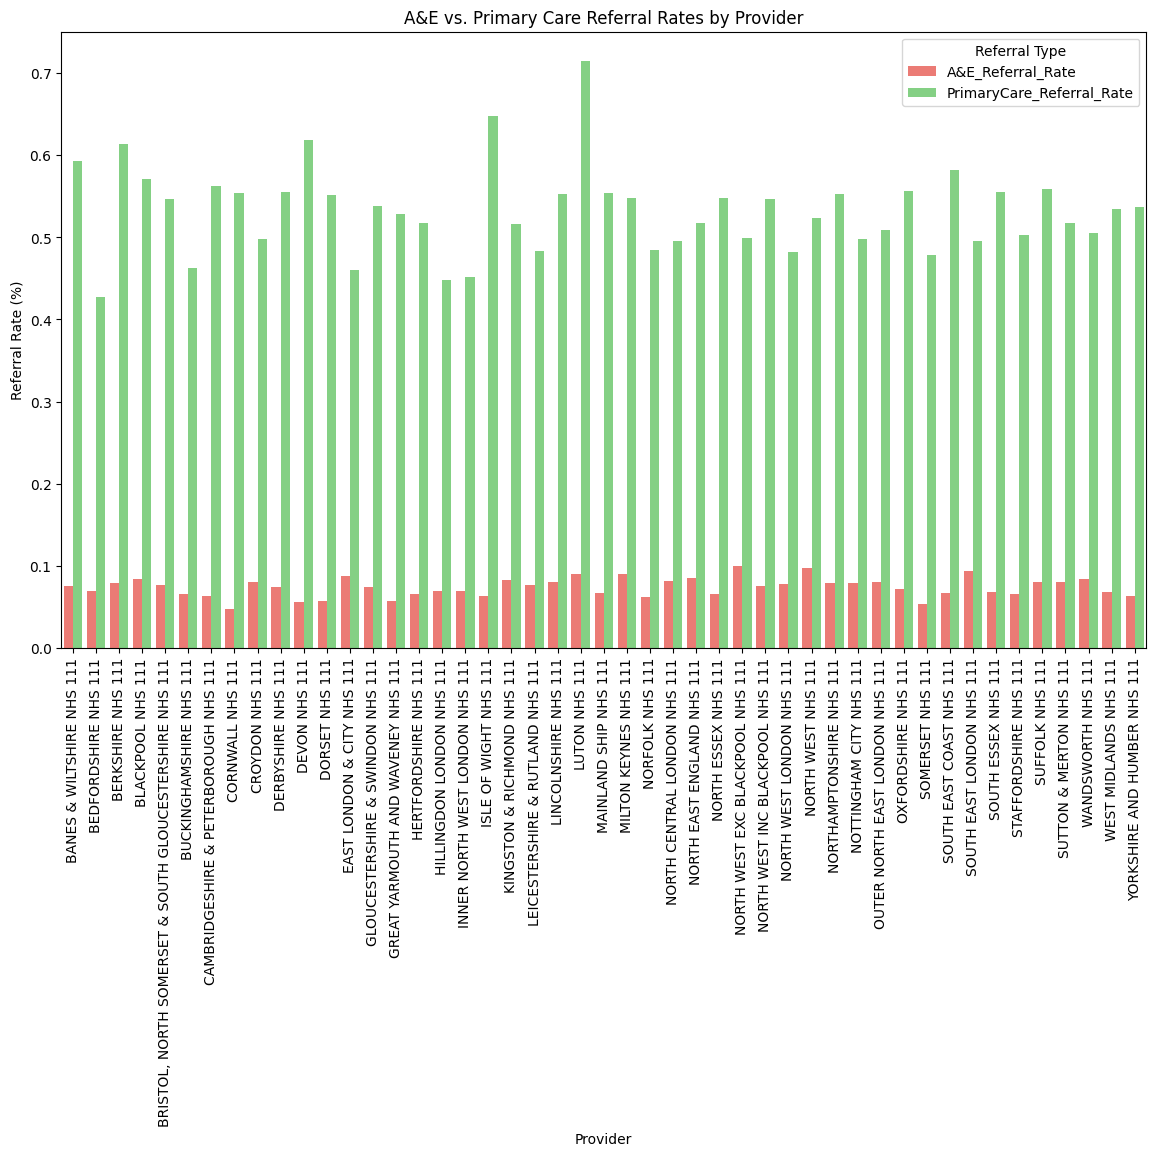

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
provider_stats_melted = provider_stats.melt(
    id_vars='Provider Name', 
    value_vars=['A&E_Referral_Rate', 'PrimaryCare_Referral_Rate'],
    var_name='Referral Type', 
    value_name='Rate'
)

sns.barplot(
    x='Provider Name', 
    y='Rate', 
    hue='Referral Type', 
    data=provider_stats_melted,
    palette={'A&E_Referral_Rate': '#ff6961', 'PrimaryCare_Referral_Rate': '#77dd77'}
)
plt.xticks(rotation=90)
plt.title('A&E vs. Primary Care Referral Rates by Provider')
plt.ylabel('Referral Rate (%)')
plt.xlabel('Provider')
plt.show()

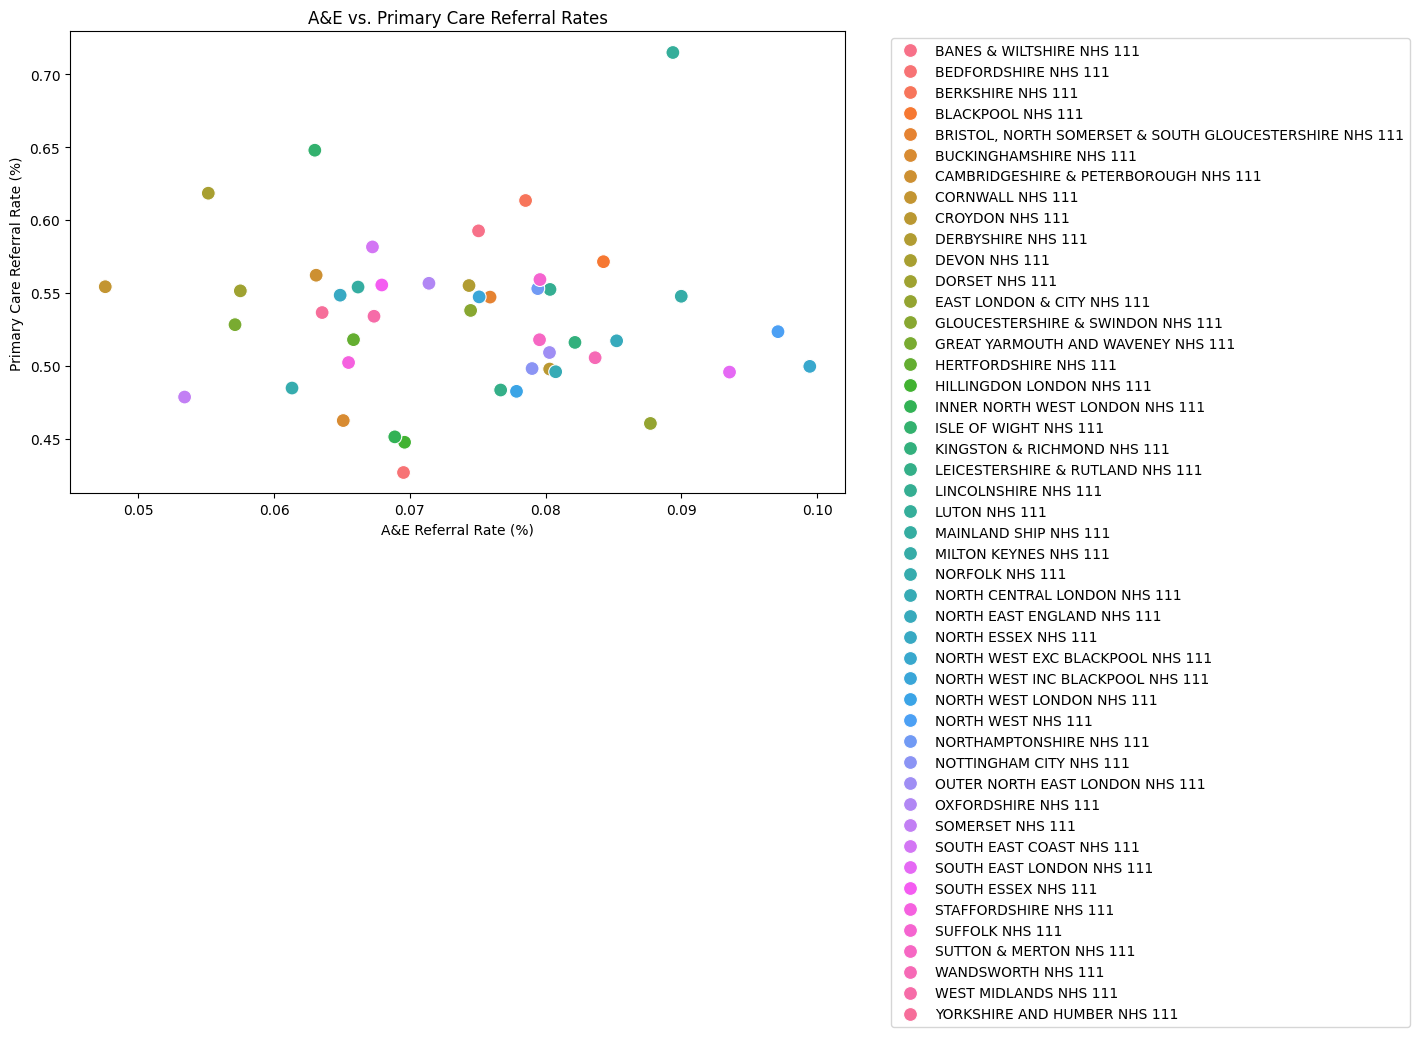

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='A&E_Referral_Rate', 
    y='PrimaryCare_Referral_Rate', 
    data=provider_stats, 
    hue='Provider Name',
    s=100
)
plt.title('A&E vs. Primary Care Referral Rates')
plt.xlabel('A&E Referral Rate (%)')
plt.ylabel('Primary Care Referral Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
-- SQL query to calculate A&E referral rate
SELECT 
  Provider_Name,
  SUM(Nhs1_Recommend_To_Ae_SUM) / SUM(Nhs1_Answered_Calls_SUM) AS A_E_Rate
FROM nhs_data
GROUP BY Provider_Name;

### Calculate KPI Rates

In [32]:
##  Calculate KPI rates
data['Answered_60sec_Rate'] = (data['Nhs1 Answered 60sec SUM'] / data['Nhs1 Answered Calls SUM']) * 100  # %
data['Callback_10min_Compliance'] = (data['Nhs1 Calls Back Within 10mins SUM'] / data['Nhs1 Person Offered Call Back SUM']) * 100  # %

# Handle missing/zero values (e.g., no callbacks offered)
data['Callback_10min_Compliance'] = data['Callback_10min_Compliance'].fillna(0)  # Treat "no callbacks" as 0% compliance

### Rank Providers for Each Providers

In [33]:
# Rank by % of calls answered within 60 seconds (higher is better)
data['Rank_Answered_60sec'] = data['Answered_60sec_Rate'].rank(ascending=False, method='min').astype(int)

# Rank by % of callbacks within 10 minutes (higher is better)
data['Rank_Callback_Compliance'] = data['Callback_10min_Compliance'].rank(ascending=False, method='min').astype(int)

# Create a combined score 
data['Combined_Rank'] = (data['Rank_Answered_60sec'] + data['Rank_Callback_Compliance']) / 2

### Top 5 Providers by Calls Answered Quickly

In [34]:
answered_60sec_ranked = data.sort_values('Answered_60sec_Rate', ascending=False)[[
    'Provider Name', 
    'Answered_60sec_Rate',
    'Rank_Answered_60sec'
]].head(5)

print("🏆 Top 5 Providers by Calls Answered in 60 Seconds:")
print(answered_60sec_ranked.to_string(index=False))

🏆 Top 5 Providers by Calls Answered in 60 Seconds:
                     Provider Name  Answered_60sec_Rate  Rank_Answered_60sec
              BEDFORDSHIRE NHS 111           100.000000                    1
                     LUTON NHS 111            99.595142                    2
GREAT YARMOUTH AND WAVENEY NHS 111            99.534050                    3
               SOUTH ESSEX NHS 111            99.255871                    4
               NORTH ESSEX NHS 111            99.212981                    5


### Top 5 Providers by Callback Compliance:

In [35]:
callback_ranked = data.sort_values('Callback_10min_Compliance', ascending=False)[[
    'Provider Name', 
    'Callback_10min_Compliance',
    'Rank_Callback_Compliance'
]].head(5)

print("\n📞 Top 5 Providers by 10-Minute Callback Compliance:")
print(callback_ranked.to_string(index=False))


📞 Top 5 Providers by 10-Minute Callback Compliance:
        Provider Name  Callback_10min_Compliance  Rank_Callback_Compliance
  OXFORDSHIRE NHS 111                  99.187652                         1
MAINLAND SHIP NHS 111                  99.153930                         2
 BEDFORDSHIRE NHS 111                  99.041534                         3
    BERKSHIRE NHS 111                  98.914355                         4
        LUTON NHS 111                  98.888889                         5


### Grouped Bar Chart (Top 10 Providers):

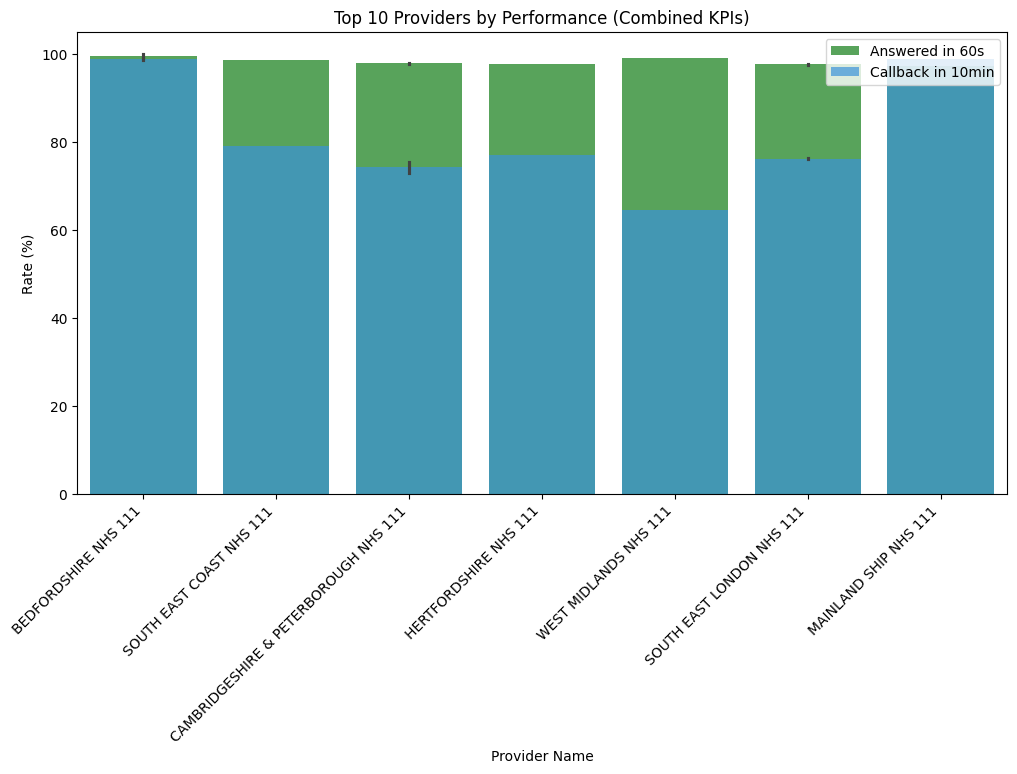

In [36]:
top_providers = data.sort_values('Combined_Rank').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Provider Name', 
    y='Answered_60sec_Rate', 
    data=top_providers, 
    color='#4CAF50', 
    label='Answered in 60s'
)
sns.barplot(
    x='Provider Name', 
    y='Callback_10min_Compliance', 
    data=top_providers, 
    color='#2196F3', 
    alpha=0.7, 
    label='Callback in 10min'
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Providers by Performance (Combined KPIs)')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()

### Calculate Key Rates per 1000 Residents

In [37]:
data.loc[:, 'Calls_Offered_Per_1k'] = (data['Nhs1 Number Calls Offered SUM'] / data['Nhs1 Population SUM']) * 1000
data.loc[:, 'Calls_Answered_60sec_Per_1k'] = (data['Nhs1 Answered 60sec SUM'] / data['Nhs1 Population SUM']) * 1000
data.loc[:, 'Ambulance_Dispatches_Per_1k'] = (data['Nhs1 Amb Dispatches SUM'] / data['Nhs1 Population SUM']) * 1000

In [38]:
population_stats = data.groupby('Provider Name').agg({
    'Nhs1 Population SUM': 'mean',
    'Calls_Offered_Per_1k': 'mean',
    'Ambulance_Dispatches_Per_1k': 'mean'
}).sort_values('Calls_Offered_Per_1k', ascending=False)

population_stats.head()

,Nhs1 Population SUM,Calls_Offered_Per_1k,Ambulance_Dispatches_Per_1k
Provider Name,,,
ISLE OF WIGHT NHS 111,140025.000000,37.173980,3.853484
HILLINGDON LONDON NHS 111,297508.333333,35.804627,3.141044
BLACKPOOL NHS 111,467200.000000,30.672803,2.097246
NORFOLK NHS 111,785316.666667,29.747547,2.670505
"BRISTOL, NORTH SOMERSET & SOUTH GLOUCESTERSHIRE NHS 111",932450.000000,29.187676,3.076803


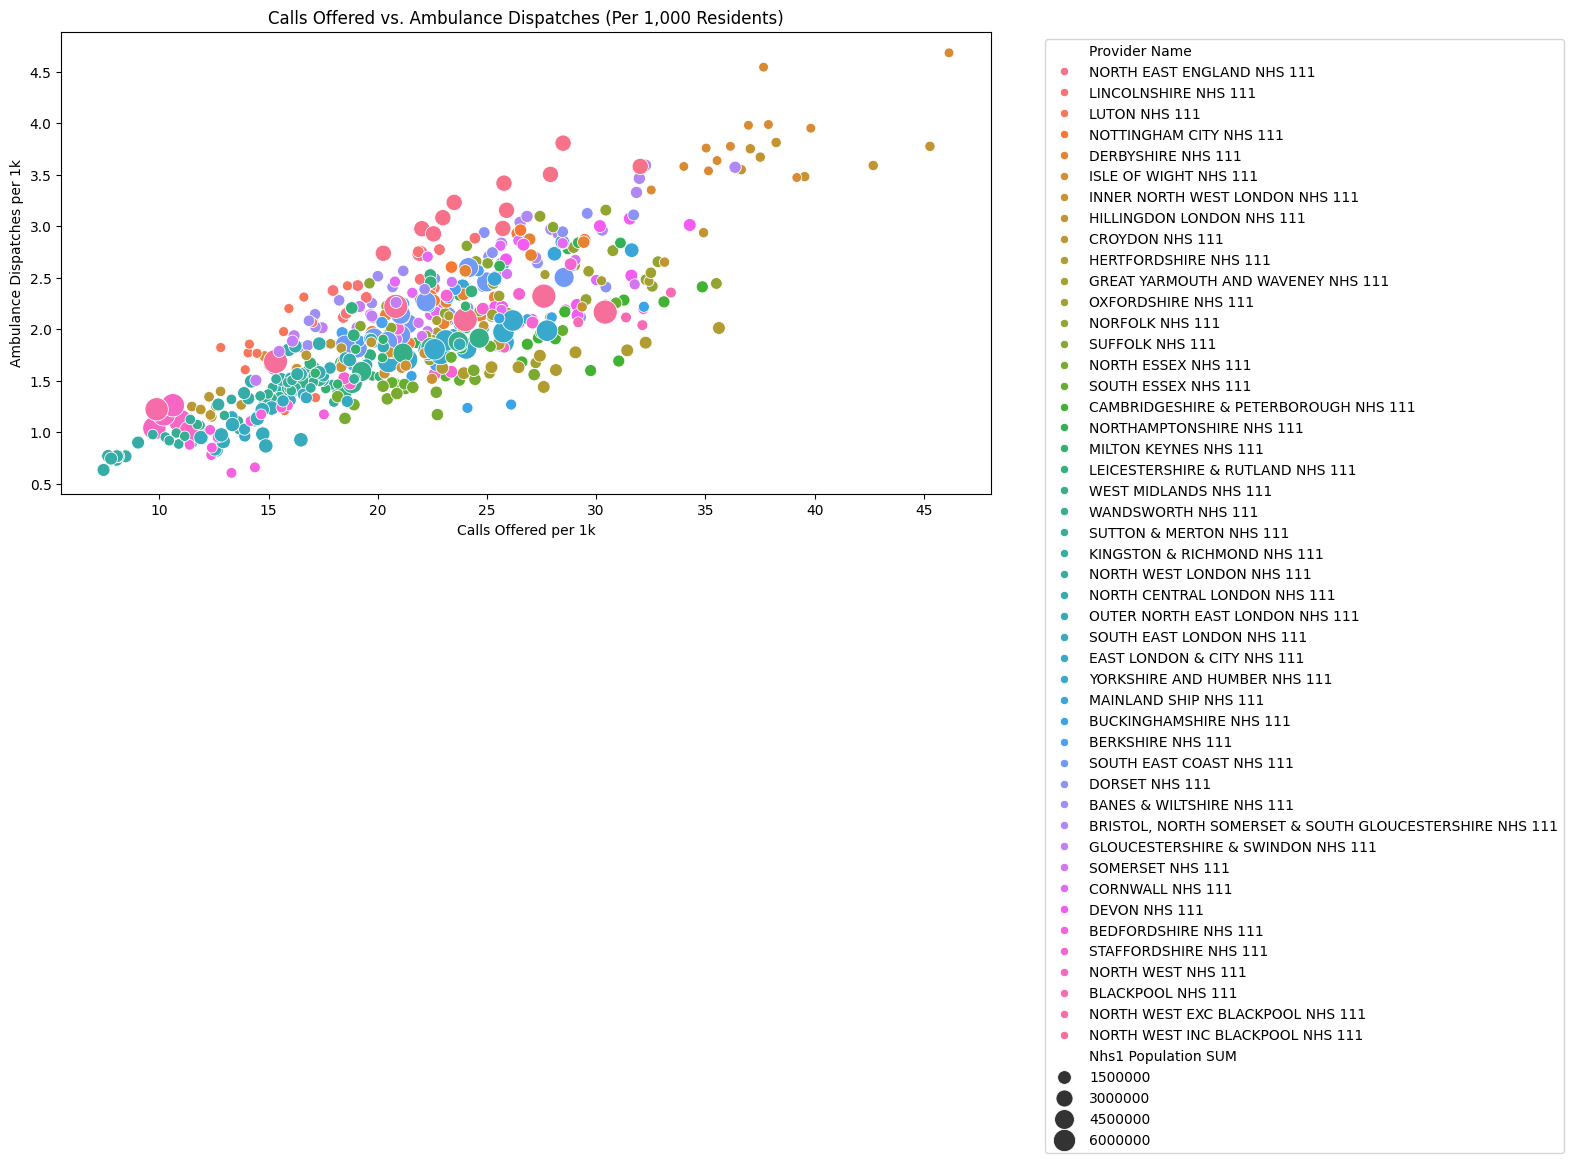

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Calls_Offered_Per_1k', 
    y='Ambulance_Dispatches_Per_1k', 
    data=data, 
    hue='Provider Name', 
    size='Nhs1 Population SUM',
    sizes=(50, 300)
)
plt.title('Calls Offered vs. Ambulance Dispatches (Per 1,000 Residents)')
plt.xlabel('Calls Offered per 1k')
plt.ylabel('Ambulance Dispatches per 1k')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Prepare Time-Series Data

In [41]:
# Aggregate monthly calls
monthly_calls = data.groupby('Periodname').agg({'Nhs1 Number Calls Offered SUM': 'sum'}).reset_index()
monthly_calls['Periodname'] = pd.to_datetime(monthly_calls['Periodname'], format='%b-%y')
monthly_calls.set_index('Periodname', inplace=True)

### Fit ARIMA Model

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

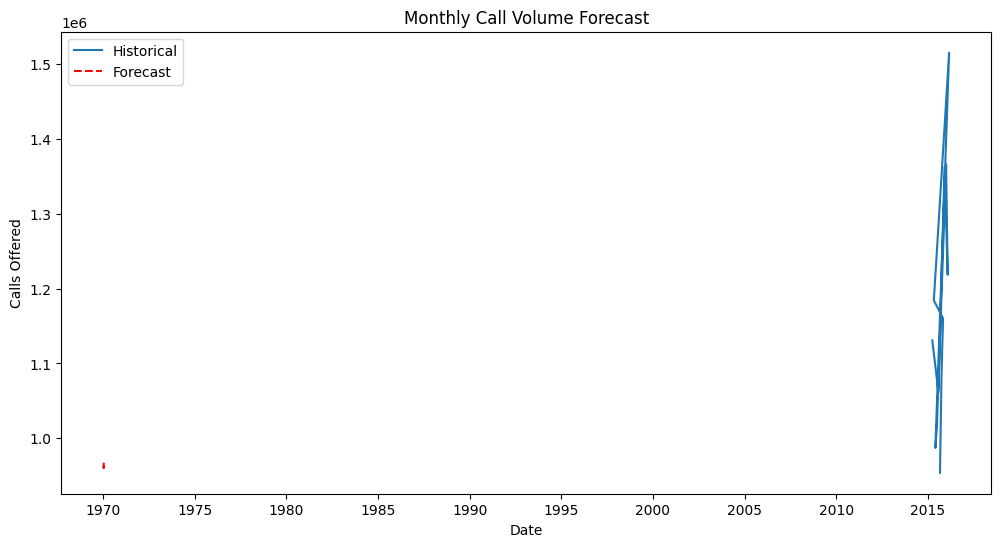

In [42]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(monthly_calls, order=(1, 1, 1))  # Adjust parameters via AIC
results = model.fit()

# Forecast next 3 months
forecast = results.get_forecast(steps=3)
forecast_mean = forecast.predicted_mean

# Visualize Forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_calls, label='Historical')
plt.plot(forecast_mean, color='red', linestyle='--', label='Forecast')
plt.title('Monthly Call Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Calls Offered')
plt.legend()
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = data[['Nhs1 Number Calls Offered SUM']]  # Call volume
y = data['Nhs1 Time Call Handlers SUM']      # Staff hours

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict staff hours for future call volumes
future_calls = [[35000]]  # Example: 35k calls
predicted_staff_hours = model.predict(future_calls)
print(f"Predicted staff hours: {predicted_staff_hours[0]:.0f}")

Predicted staff hours: 221241


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
import pandas as pd
import plotly.express as px
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html, Input, Output, callback
import numpy as np

# Load and clean data
def clean_data(data):
    # Calculate key metrics with error handling
    data['Nhs1 Calls Offered'] = data['Nhs1 Number Calls Offered SUM']
    data['Nhs1 Calls Answered'] = data['Nhs1 Answered Calls SUM']
    
    # Handle division by zero and missing values
    data['Nhs1 Abandon Rate'] = (data['Nhs1 Abandoned Calls SUM'] / 
                                 data['Nhs1 Calls Offered'].replace(0, np.nan)).fillna(0) * 100
    data['Ambulance Dispatch Rate'] = (data['Nhs1 Amb Dispatches SUM'] / 
                                       data['Nhs1 Calls Answered'].replace(0, np.nan)).fillna(0) * 100
    
    # Cost metrics
    if 'Nhs1 Cost Clinical Staff SUM' in data.columns:
        data['Cost per Call'] = ((data['Nhs1 Cost Call Handlers SUM'] + 
                                 data['Nhs1 Cost Clinical Staff SUM']) / 
                                data['Nhs1 Calls Answered'].replace(0, np.nan)).fillna(0)
    
    return data

# Initialize app with NHS styling
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = "NHS 111 Service Quality Dashboard"
server = app.server

# App layout
app.layout = dbc.Container([
    html.H1("NHS 111 Service Quality Dashboard", className='text-center mb-4 text-primary'),
    
    dbc.Row([
        dbc.Col(dcc.Dropdown(
            id='provider-dropdown',
            options=[{'label': prov, 'value': prov} 
                     for prov in sorted(data['Provider Name'].unique())],
            multi=True,
            placeholder='Select Provider(s)',
            className='mb-4'
        ), width=12)
    ]),
    
    dcc.Tabs(id="analysis-tabs", value='tab-summary', children=[
        dcc.Tab(label='Performance Summary', value='tab-summary',
                className='custom-tab', selected_className='custom-tab--selected'),
        dcc.Tab(label='Clinical Outcomes', value='tab-outcomes',
                className='custom-tab', selected_className='custom-tab--selected'),
        dcc.Tab(label='Regional Analysis', value='tab-regional',
                className='custom-tab', selected_className='custom-tab--selected'),
        dcc.Tab(label='Cost Efficiency', value='tab-cost',
                className='custom-tab', selected_className='custom-tab--selected')
    ], className='custom-tabs-container'),
    
    html.Div(id='tabs-content', className='mt-4')
], fluid=True)

@callback(
    Output('tabs-content', 'children'),
    [Input('analysis-tabs', 'value'),
     Input('provider-dropdown', 'value')]
)
def render_tab_content(tab, selected_providers):
    filtered_data = data.copy()
    if selected_providers:
        filtered_data = filtered_data[filtered_data['Provider Name'].isin(selected_providers)]
    
    if tab == 'tab-summary':
        return dbc.Row([
            dbc.Col(summary_card("Total Calls Offered", 
                                 filtered_data['Nhs1 Calls Offered'].sum()), width=3),
            dbc.Col(summary_card("Average Abandon Rate", 
                                 f"{filtered_data['Nhs1 Abandon Rate'].mean():.1f}%"), width=3),
            dbc.Col(summary_card("Ambulance Dispatch Rate", 
                                 f"{filtered_data['Ambulance Dispatch Rate'].mean():.1f}%"), width=3),
            dbc.Col(summary_card("Avg Cost per Call", 
                                 f"£{filtered_data['Cost per Call'].mean():.2f}"), width=3)
        ])
    
    elif tab == 'tab-outcomes':
        return outcomes_tab(filtered_data)
    
    elif tab == 'tab-regional':
        return regional_analysis(filtered_data)
    
    elif tab == 'tab-cost':
        return cost_analysis(filtered_data)

def summary_card(title, value):
    return dbc.Card([
        dbc.CardBody([
            html.H5(title, className="card-title"),
            html.H2(value, className="card-text")
        ])
    ], className="text-center shadow-sm")

def outcomes_tab(data):
    return dbc.Row([
        dbc.Col(dcc.Graph(
            figure=px.bar(data, 
                          x='Provider Name', 
                          y=['Nhs1 Recommend To Ae', 'Nhs1 Recommend To Primcare'],
                          title='Clinical Referral Patterns',
                          labels={'value': 'Referral Count'},
                          barmode='group')
        ), width=6),
        
        dbc.Col(dcc.Graph(
            figure=px.scatter(data,
                              x='Ambulance Dispatch Rate',
                              y='Nhs1 Abandon Rate',
                              color='Provider Name',
                              size='Nhs1 Calls Offered',
                              title='Service Quality Correlation',
                              hover_name='Provider Name')
        ), width=6)
    ])

def regional_analysis(data):
    return dbc.Row([
        dbc.Col(dcc.Graph(
            figure=px.choropleth(data,
                                 locations='Provider Name',
                                 locationmode='country names',  # changed from 'country-uk' to standard
                                 color='Nhs1 Calls Offered',
                                 scope='europe',
                                 title='Call Volume by Region')
        ), width=12)
    ])

def cost_analysis(data):
    return dbc.Row([
        dbc.Col(dcc.Graph(
            figure=px.scatter(data,
                              x='Cost per Call',
                              y='Ambulance Dispatch Rate',
                              color='Provider Name',
                              size='Nhs1 Calls Answered',
                              title='Cost Efficiency Analysis',
                              trendline="lowess")
        ), width=12)
    ])

if __name__ == "__main__":
    app.run(debug=True, port=8051)


[2025-04-26 22:13:40,280] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Ambulance Dispatch Rate'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13